In [1]:
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.getcwd()))
print(SCRIPT_DIR)
sys.path.append(os.path.normpath(SCRIPT_DIR))
# sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

/work/tianjunm/monaural-source-separation


In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2

import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd

import json
import datasets.setup
import models.setup
import loss_functions.setup

### Loading the dataset

In [3]:
config_path = '/work/tianjunm/monaural-source-separation/experiments/hyperparameter/csa_lstm/000.json'
with open(config_path) as f:
    config = json.load(f)

In [4]:
train_dataloader = datasets.setup.prepare_dataloader(config, 'train')

val_dataloader = datasets.setup.prepare_dataloader(config, 'val')

model = models.setup.prepare_model(config, train_dataloader.dataset.input_shape)

<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/saxophone.csd ...


 39%|███▉      | 39/99 [00:00<00:00, 376.60 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...


<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/police_siren.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/banjo.csd ...


 51%|█████     | 50/98 [00:00<00:00, 435.36 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_banjo> computational sequence ...


<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/waterfall.csd ...


 45%|████▌     | 34/75 [00:00<00:00, 315.53 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...


<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/ukulele.csd ...


 42%|████▏     | 41/97 [00:00<00:00, 396.57 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...


<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/motorboat.csd ...


 36%|███▌      | 36/100 [00:00<00:00, 358.14 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...


<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fireworks.csd ...


 27%|██▋       | 26/98 [00:00<00:00, 227.65 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...


<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/acoustic_guitar.csd ...


 42%|████▏     | 42/101 [00:00<00:00, 390.85 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...


<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/piano.csd ...


 27%|██▋       | 27/99 [00:00<00:00, 266.69 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...


<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...


 33%|███▎      | 32/98 [00:00<00:00, 319.30 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...


<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bird.csd ...


 31%|███       | 31/100 [00:00<00:00, 309.96 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...


<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/gun.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/keys_jangling.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/flute.csd ...


  2%|▏         | 2/102 [00:00<00:07, 13.02 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...


<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/rain.csd ...


 32%|███▏      | 32/100 [00:00<00:00, 318.35 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...


<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bass_guitar.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format


<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/electric_guitar.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/cowbell.csd ...


 34%|███▍      | 34/100 [00:01<00:02, 28.79 Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...


<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/telephone_bell_ring.csd ...


 10%|█         | 10/99 [00:00<00:00, 97.85 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...


<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/applause.csd ...


 29%|██▉       | 29/99 [00:00<00:00, 266.62 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_applause> computational sequence ...


<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_singing.csd ...


 24%|██▍       | 24/100 [00:00<00:00, 231.89 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...


<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snoring.csd ...


 32%|███▏      | 32/100 [00:00<00:00, 290.18 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...


<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/raindrop.csd ...


  9%|▉         | 9/99 [00:00<00:01, 78.44 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...


<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snare_drum.csd ...


  8%|▊         | 8/100 [00:00<00:01, 79.50 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...


<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/firetruck_siren.csd ...


 53%|█████▎    | 53/100 [00:00<00:00, 527.29 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...


<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/baby_laughter.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tearing.csd ...


 41%|████      | 28/69 [00:00<00:00, 274.05 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...


<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/trumpet.csd ...


 31%|███       | 31/100 [00:00<00:00, 291.30 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...


<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/vacuum_cleaner.csd ...


 30%|███       | 30/99 [00:00<00:00, 298.83 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...


<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/wind.csd ...


 30%|███       | 30/99 [00:00<00:00, 277.58 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_wind> computational sequence ...


<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/writing.csd ...


 37%|███▋      | 34/93 [00:00<00:00, 335.92 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...


<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/violin.csd ...


 40%|███▉      | 40/101 [00:00<00:00, 371.03 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...


<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_speech.csd ...


 40%|████      | 40/100 [00:00<00:00, 398.94 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_male_speech> computational sequence ...


<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tambourine.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/frying.csd ...


 17%|█▋        | 17/100 [00:00<00:00, 155.79 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...


  0%|          | 0/35 [00:00<?, ? Computational Sequence Entries/s]           

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...


<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/duck.csd ...


 50%|█████     | 50/100 [00:00<00:00, 451.86 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_duck> computational sequence ...


<Success>: <cut_normalized_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/engine.csd ...


 35%|███▌      | 35/100 [00:00<00:00, 349.39 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_engine> computational sequence ...


<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/race_car.csd ...


 52%|█████▏    | 40/77 [00:00<00:00, 375.24 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...


<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/cat.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/knock.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_knock> computational sequence ...
<Success>: <cut_normalized_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_knock> computational sequence ...
<Success>: <cut_normalized_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/child_speech.csd ...


 32%|███▏      | 32/100 [00:00<00:00, 315.30 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_child_speech> computational sequence ...


<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/female_singing.csd ...


 35%|███▌      | 35/100 [00:00<00:00, 347.32 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_female_singing> computational sequence ...


<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/chainsaw.csd ...


 16%|█▌        | 16/100 [00:00<00:00, 153.00 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_chainsaw> computational sequence ...


<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/faucet.csd ...


 34%|███▍      | 34/100 [00:00<00:00, 308.89 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_faucet> computational sequence ...


<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/church_bell.csd ...


 32%|███▏      | 32/100 [00:00<00:00, 301.75 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_church_bell> computational sequence ...


<Success>: <cut_normalized_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/car.csd ...


 40%|████      | 40/99 [00:00<00:00, 360.37 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_car> computational sequence ...


<Success>: <cut_normalized_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_car> computational sequence ...
<Success>: <cut_normalized_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/civil_defense_siren.csd ...


  7%|▋         | 7/100 [00:00<00:01, 67.22 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_civil_defense_siren> computational sequence ...


<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/water.csd ...


 33%|███▎      | 32/98 [00:00<00:00, 275.12 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_water> computational sequence ...


<Success>: <cut_normalized_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/shaver.csd ...


 41%|████      | 41/100 [00:00<00:00, 393.47 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_shaver> computational sequence ...


<Success>: <cut_normalized_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_shaver> computational sequence ...
<Success>: <cut_normalized_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/lawn_mower.csd ...


 43%|████▎     | 32/75 [00:00<00:00, 316.62 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_lawn_mower> computational sequence ...


<Success>: <cut_normalized_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_lawn_mower> computational sequence ...
<Success>: <cut_normalized_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/engine_idling.csd ...


 32%|███▏      | 32/99 [00:00<00:00, 319.45 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_engine_idling> computational sequence ...


<Success>: <cut_normalized_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine_idling> computational sequence ...
<Success>: <cut_normalized_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bark.csd ...


 13%|█▎        | 13/99 [00:00<00:00, 121.97 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_bark> computational sequence ...


<Success>: <cut_normalized_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/saxophone.csd ...


  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/gun.c

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/electric_guitar.csd ...
<Status>: Check

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snoring.csd ...
<Statu

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/baby_laughter.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Succ

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data 

<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_car> computational sequence ...
<Success>: <cut_normalized_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/wa

<Success>: <cut_normalized_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 


In [5]:
loss_fn = loss_functions.setup.prepare_loss_fn(config)

In [6]:
for i, batch in enumerate(val_dataloader):
    model_input = batch['model_input']
    ground_truths = batch['ground_truths']
    components = batch['component_info']
    break

print(model_input.shape)
print(ground_truths.shape)

torch.Size([32, 2, 167, 129])
torch.Size([32, 2, 2, 167, 129])


In [7]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)


def create_composite(tensor):
    real = tensor[0].numpy().T
    imag = tensor[1].numpy().T
    composite = real + 1j * imag
    return composite


def visualize_input(tensor, config, feature):
    composite = create_composite(tensor)
    if feature == 'spectrogram':
        fig = plt.figure(figsize=(3, 1))
        plt.subplot(1, 1, 1)
        display(composite, sample_rate=config['dataset']['config']['sample_rate'])
    
    elif feature == 'pcm':
        pcm = scipy.signal.istft(composite, nperseg=256, noverlap=64)
        return pcm
        

def visualize_output(tensors, config, feature, class_names=None):
    c = tensors.size(0)
    composites = []

    for src in range(c):
        composites.append(create_composite(tensors[src]))

    if feature == 'spectrogram':
        for src, composite in enumerate(composites):
            fig = plt.figure(figsize=(3, c))
            plt.subplot(c, 1, src + 1)
            plt.title(class_names[src])
            display(composite, sample_rate=config['dataset']['config']['sample_rate'])
        
    elif feature == 'pcm':
        pcms = []
        for composite in composites:
            pcms.append(scipy.signal.istft(composite, nperseg=256, noverlap=64))
        return pcms


In [8]:
batch_idx = 4
sample_input = model_input[batch_idx]
sample_gt = ground_truths[batch_idx]
sample_components = [samples[batch_idx] for samples in components]

sample_input.size()

torch.Size([2, 167, 129])

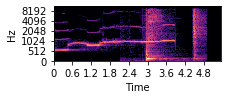

In [9]:
visualize_input(sample_input, config, 'spectrogram')

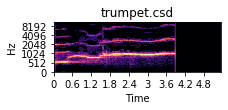

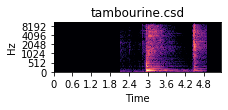

In [10]:
visualize_output(sample_gt, config, 'spectrogram', class_names=sample_components)

In [11]:
input_pcm = visualize_input(sample_input, config, 'pcm')
gt_pcms = visualize_output(sample_gt, config, 'pcm')

In [12]:
IPython.display.Audio(data=input_pcm, rate=config['dataset']['config']['sample_rate'])

In [13]:
IPython.display.Audio(data=gt_pcms[0], rate=config['dataset']['config']['sample_rate'])

In [14]:
IPython.display.Audio(data=gt_pcms[1], rate=config['dataset']['config']['sample_rate'])

visualize sample data

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [16]:
model = model.to(device)

In [17]:
model_output = model(model_input)

In [18]:
print(model_input.size())

torch.Size([32, 2, 167, 129])


In [47]:
loss = loss_fn(model_input, model_output, ground_truths)

In [48]:
loss

tensor(8.4882e+12, grad_fn=<MeanBackward0>)

In [49]:
loss.backward()

In [283]:
preds = net(aggregate.to(device))
# preds = net(aggregate.to(device), ground_truths.to(device), None, subseq_mask)
print(aggregate.shape)
print(preds.shape)
# preds2, _ = net2(aggregate)

torch.Size([4, 460, 258])
torch.Size([4, 460, 2, 258])


In [268]:
cgts, revs = get_spects(preds.detach(), fs=fs, nperseg=nperseg, noverlap=noverlap, xid=xid)

(460, 258)
(129, 460)
(460, 258)
(129, 460)
